In this Colab Notebook we are going to display some of the most relevant datasets:


1.   ABIDE-II
2.   ADNI
3.   LA5C
4.   OASIS-1 & 2
5.   Mindboggle-101
6.   MIRIAD
7.   HCP
8.   THP

For each of these, I will write done the most important aspects (sample size, MRI modality types, etc.)







# 0. Imports and useful functions

In [ ]:
!pip install rarfile

In [ ]:
import numpy as np
import os
import rarfile as rar
import nibabel as nib
import matplotlib.pyplot as plt
import shutil
import scipy.ndimage as ndi

## 0.1. Utils

In [ ]:
# Extract .rar files:
def extract_all_rar_files(rar_file_path, extraction_folder):
    os.makedirs(extraction_folder, exist_ok=True)

    with rar.RarFile(rar_file_path, 'r') as archive:
        for entry in archive.infolist():
            if entry.filename.endswith('.rar'):
                subfolder = os.path.join(extraction_folder, entry.filename.replace('.rar', ''))
                os.makedirs(subfolder, exist_ok=True)
                subrar_file = os.path.join(subfolder, entry.filename)
                archive.extract(entry, path=subfolder)
                extract_all_rar_files(subrar_file, subfolder)

In [ ]:
# Remove directory
def remove_directory(path):
  shutil.rmtree(path)

In [ ]:
# Getting all files in a directory:
def list_files_in_directory(root_directory):
    file_list = []

    for root, directories, files in os.walk(root_directory):
        for filename in files:
            file_list.append(os.path.join(root, filename))

    return file_list

# 1. ABIDE-II (Autism Brain Imaging Data Exchange II)

This dataset comprises contributions from a total of 21 institutes, medical centers, and universities. Each of these contributors has provided a dataset with a different number of individuals and sizes ranging from 2 to 3 gigabytes.

## 1.1 Barrow Neurological Institute (BNI)

Participants were scanned on a **3.0 Tesla Ingenia** scanner.

### 1.1.1 Sample Size

**Total patients:** N = 58 (age range 18-64 years)

**Autism Spectrum Disorders (ASD):** n = 13 (18-25 years), n = 16 (40-62 years)

**Typical Controls (TC):** n = 10 (18-25 years), n = 19 (40-64 years)

Each patient folder has the following contents:

1.   `anat_rpi.nii` scan
2.   `dti.nii` scan
3.   `rest.nii` scan


### 1.1.2 MRI Modalities and Scan Parameters

MRI data shared include: **MPRAGE**, **FLAIR**, resting state **fMRI** and **diffusion tensor imaging**. Please see attachment below for specific scan parameters.

MPRAGE, FLAIR, resting-state fMRI (functional magnetic resonance imaging), and diffusion tensor imaging (DTI) are distinct MRI techniques used to capture different aspects of brain structure, function, and connectivity. Here's a brief overview of each technique and their differences:

1. **MPRAGE (Magnetization Prepared Rapid Gradient Echo):**
   - MPRAGE is a structural MRI technique primarily used to obtain high-resolution images of the brain's anatomy.
   - It provides detailed information about the brain's gray matter, white matter, and cerebrospinal fluid (CSF) spaces, allowing for the visualization of brain structures.
   - MPRAGE is often used for anatomical reference in various brain studies, such as localization of functional brain regions or the assessment of structural abnormalities.

2. **FLAIR (Fluid-Attenuated Inversion Recovery):**
   - FLAIR is another structural MRI technique that is particularly sensitive to pathological changes in the brain, such as lesions, tumors, and inflammation.
   - It is designed to suppress the signal from CSF, making it easier to detect abnormalities near CSF-filled spaces.
   - FLAIR imaging is commonly used in diagnosing and monitoring conditions like multiple sclerosis, stroke, and brain tumors.

3. **Resting-State fMRI (functional magnetic resonance imaging):**
   - Resting-state fMRI measures spontaneous low-frequency fluctuations in blood oxygenation level-dependent (BOLD) signals across the brain while a person is at rest, not performing any specific task.
   - It is used to identify and study functional brain networks and connectivity patterns.
   - Resting-state fMRI can help researchers understand how different brain regions interact and communicate with each other when the brain is not engaged in a specific task.
   - It is also used to investigate brain disorders and neurological conditions, as alterations in resting-state connectivity can be indicative of certain brain diseases.

4. **Diffusion Tensor Imaging (DTI):**
   - DTI is a specialized MRI technique used to study the microstructural properties of white matter in the brain.
   - It measures the diffusion of water molecules in tissue, providing information about the orientation and integrity of axon bundles within white matter tracts.
   - DTI is crucial for mapping white matter pathways, studying connectivity, and identifying disruptions in white matter integrity.
   - It is commonly used in neuroscience research, as well as in the diagnosis and monitoring of conditions involving white matter abnormalities.


### 1.1.3 Visualizing the first 5 subjects:


In [ ]:
rar_file_path = '/content/data/ABIDEII-BNI_FIRST_5.rar'  # The path to the collection's .rar file
extracted_folder = '/content/data/ABIDEII-BNI_FIRST_5/'     # Folder location for extraction
extract_all_rar_files(rar_file_path, extracted_folder)


Subject: 29006
anat_rpi_blocked_blocked.nii shape: (193, 256, 256)
dti.nii shape: (192, 192, 48, 34)
rest.nii shape: (64, 64, 50, 120)


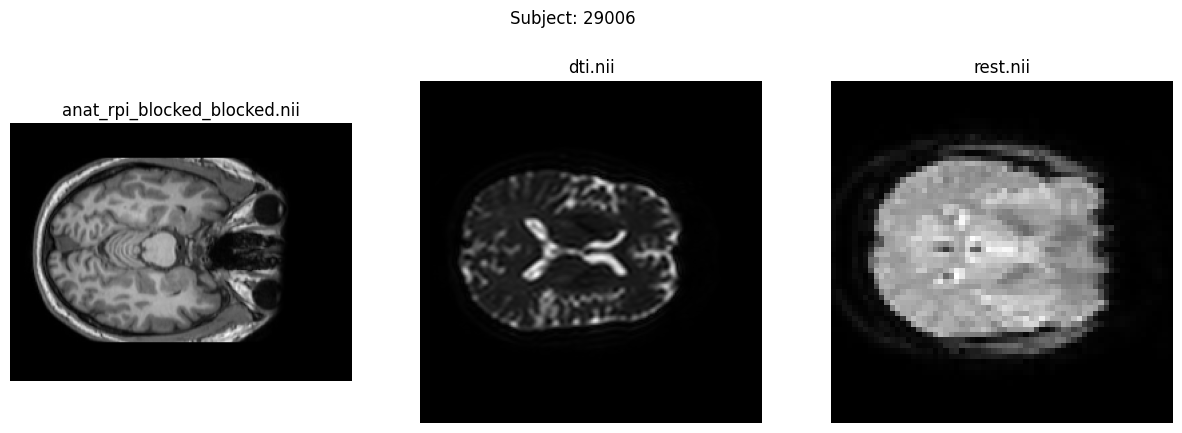

Subject: 29007
anat_rpi_blocked_blocked.nii shape: (193, 256, 256)
dti.nii shape: (192, 192, 48, 34)
rest.nii shape: (64, 64, 50, 120)


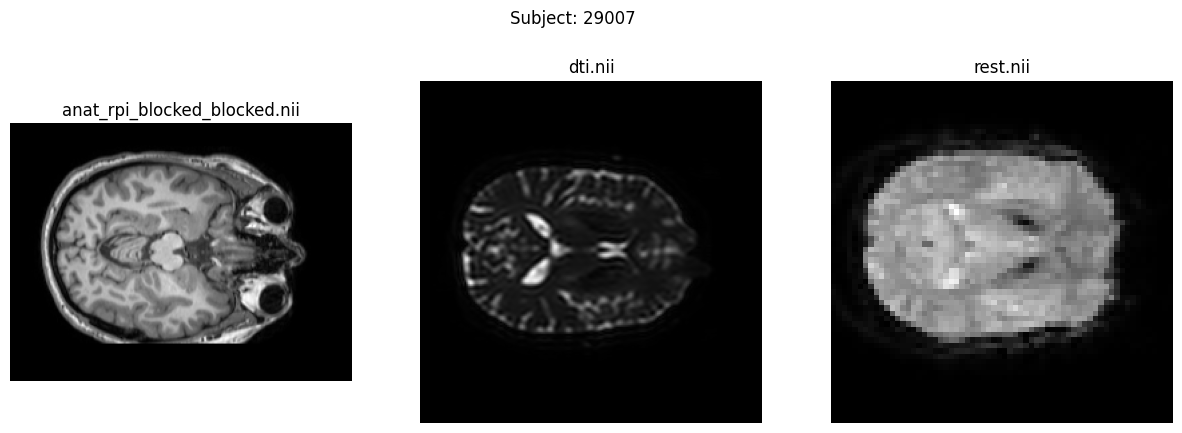

Subject: 29008
anat_rpi_blocked_blocked.nii shape: (193, 256, 256)
dti.nii shape: (192, 192, 48, 34)
rest.nii shape: (64, 64, 50, 120)


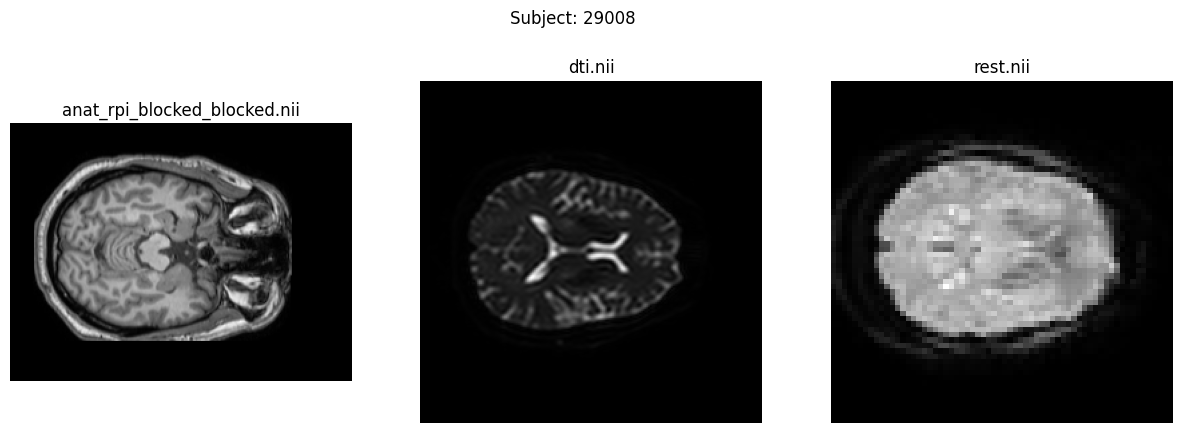

Subject: 29009
anat.nii.gz shape: (193, 256, 256)
dti.nii.gz shape: (192, 192, 48, 34)
rest.nii.gz shape: (64, 64, 50, 120)


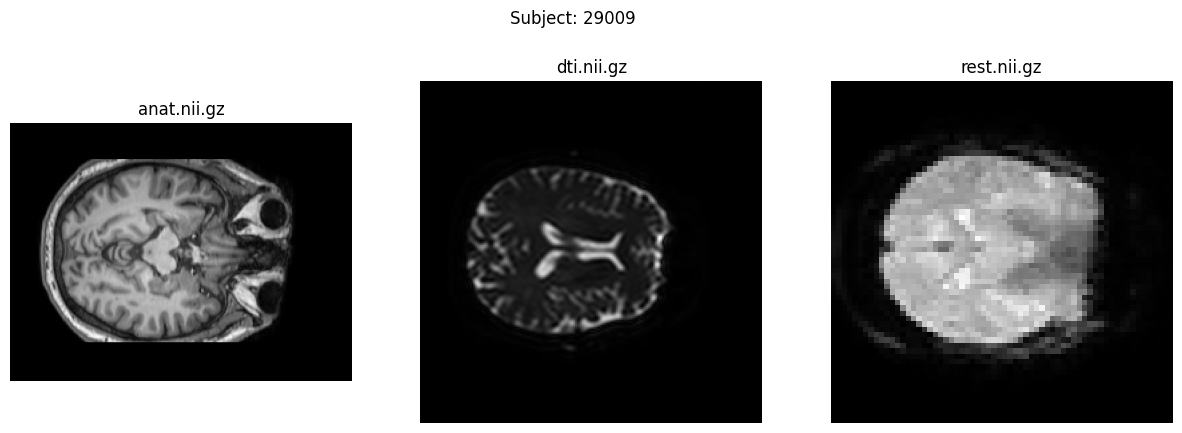

Subject: 29010
anat.nii.gz shape: (193, 256, 256)
dti.nii.gz shape: (192, 192, 48, 34)
rest.nii.gz shape: (64, 64, 50, 120)


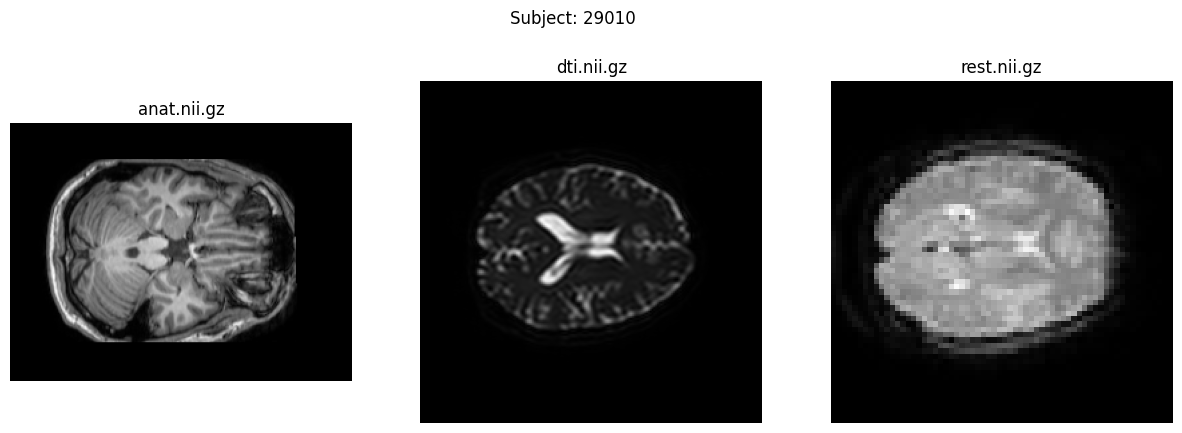

In [ ]:
# Get a list of all subjects:
subjects = os.listdir(extracted_folder)

for subject in sorted(subjects):
  nii_files = list_files_in_directory(f"{extracted_folder + subject}")
  fig_rows = 1
  fig_cols = 3
  n_subplots = fig_rows * fig_cols
  fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[15, 5])

  idx = 0
  for nii_file in sorted(nii_files):
    if nii_file.endswith('.nii') or nii_file.endswith('.nii.gz'):
      file_name = os.path.basename(nii_file)
      file_path = os.path.join(extracted_folder, nii_file)
      img = nib.load(file_path)

      # Print shapes:
      if (idx == 0):
        print(f"Subject: {subject}")
      print(f"{file_name} shape: {img.shape}")

      # Check dimensionality
      if img.get_fdata().ndim == 3:
        # Choose the middle slice along the z-axis
        slice_idx = img.shape[-1] // 2  # Assuming the slice index is along the z-axis
        slice_data = img.get_fdata()[:, :, slice_idx]
      elif img.get_fdata().ndim == 4:
        # Choose the middle slice along the z-axis
        slice_idx = img.shape[-2] // 2  # Assuming the slice index is along the z-axis
        time_point = 0
        slice_data = img.get_fdata()[:, :, slice_idx, time_point]

      axs.flat[idx].imshow(slice_data, cmap='gray')
      axs.flat[idx].axis('off')
      axs.flat[idx].set_title(file_name)
      idx += 1

  plt.suptitle("Subject: " +  subject)
  plt.show()

### 1.1.4 Visualizing data using a 3D slicer (ITK-SNAP)

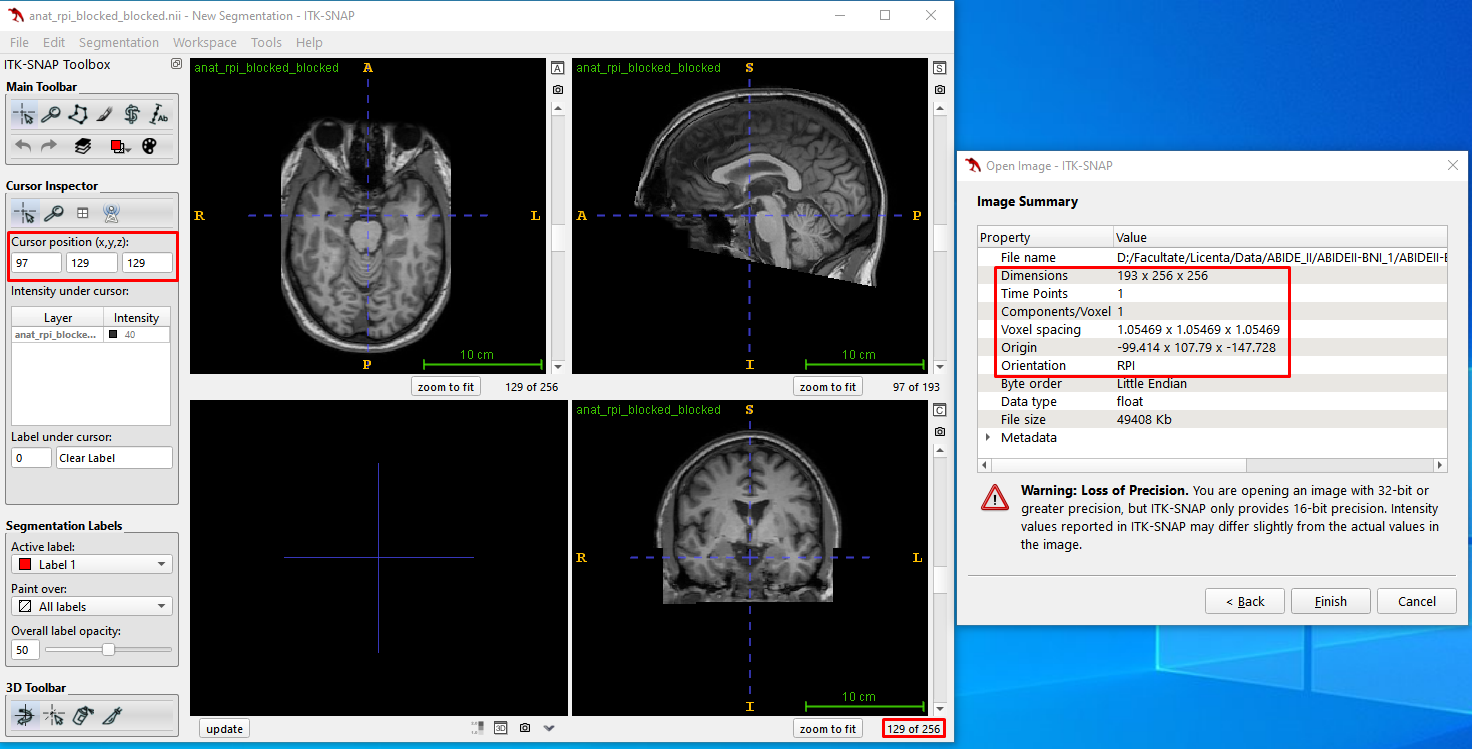

## 1.2 Erasmus University Medical CenterRotterdam (EMC)

MR images were acquired on a **3 Tesla** scanner

### 1.2.1 Sample Size

**Total:** N = 54 (age range 6-11 years)

**Autism Spectrum Disorders (ASD):** n = 27 (6-11 years)

**Typical Controls (TC):** n = 27 (6-10 years)

Each patient folder has the following contents:

1.   `anat.nii` scan
2.   `rest.nii` scan

### 1.2.2 MRI Modalities and Scan Parameters
MRI data shared include: **anatomical and resting state fMRI**.


Anatomical and resting-state functional Magnetic Resonance Imaging (fMRI) are two different types of neuroimaging techniques used to study the brain, and they serve different purposes:

**Anatomical MRI (aMRI):**

Anatomical MRI, often referred to as aMRI or structural MRI, is primarily used to visualize the anatomical structure of the brain.
It provides high-resolution images of the brain's physical structures, such as gray matter, white matter, and cerebrospinal fluid, as well as detailed images of brain regions and structures.
An aMRI scan is typically a 3D image that offers detailed information about the brain's morphology and is used for anatomical localization.
It is essential for identifying and locating brain abnormalities, tumors, lesions, and structural changes.
Resting-State fMRI (rs-fMRI):

**Resting-state fMRI, or rs-fMRI,** focuses on the functional aspects of the brain.
It measures the spontaneous low-frequency fluctuations in blood oxygenation level-dependent (BOLD) signals in the absence of specific tasks or stimuli.
Rs-fMRI is used to study the intrinsic connectivity and functional organization of the brain at rest, without requiring participants to perform specific tasks.
It allows researchers to identify resting-state networks (RSNs) and study how different brain regions interact with each other when the brain is not engaged in a specific cognitive or motor task.
Rs-fMRI is valuable for studying brain connectivity, understanding neurological and psychiatric disorders, and assessing the brain's default mode network (DMN), among other applications.
In summary, anatomical MRI provides detailed images of the brain's physical structure, while resting-state fMRI measures spontaneous fluctuations in brain activity to study functional connectivity and networks. Both techniques are essential tools in neuroimaging research and have their unique applications in understanding brain structure and function. Researchers often use a combination of these techniques to gain a comprehensive view of the brain.

However, the **Anatomical MRI (aMRI)** is typically used for segmentation tasks in neuroimaging.

### 1.2.3 Visualizing the first 5 subjects:


In [ ]:
rar_file_path = '/content/data/ABIDEII-EMC_1_First_5.rar'  # The path to the collection's .rar file
extracted_folder = '/content/data/ABIDEII-EMC_1_First_5/'  # Folder location for extraction
# Open the RAR archive
with rar.RarFile(rar_file_path, 'r') as rar:
    # Extract all files to the specified output directory
    rar.extractall(extracted_folder)

Subject: 29864
anat.nii.gz shape: (187, 256, 256)
rest.nii.gz shape: (64, 64, 37, 160)


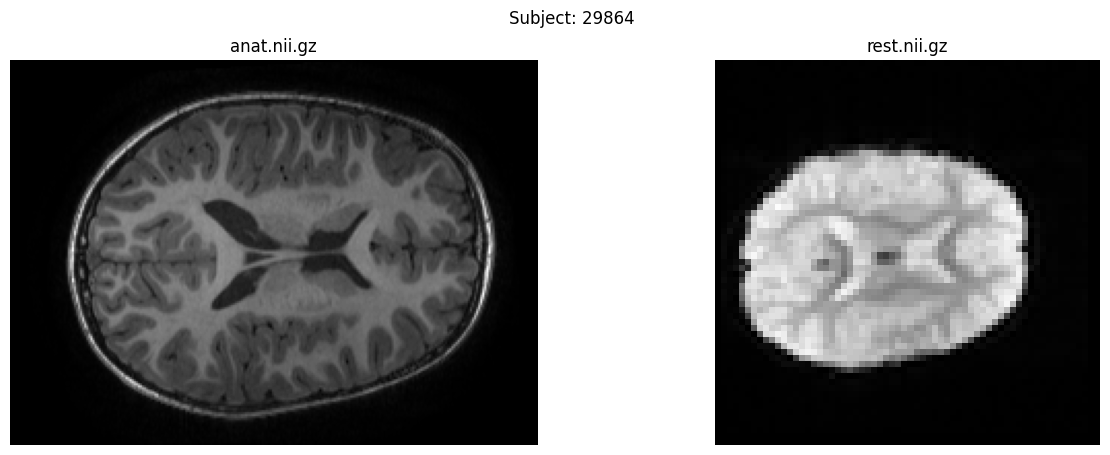

Subject: 29865
anat.nii.gz shape: (187, 256, 256)
rest.nii.gz shape: (64, 64, 37, 160)


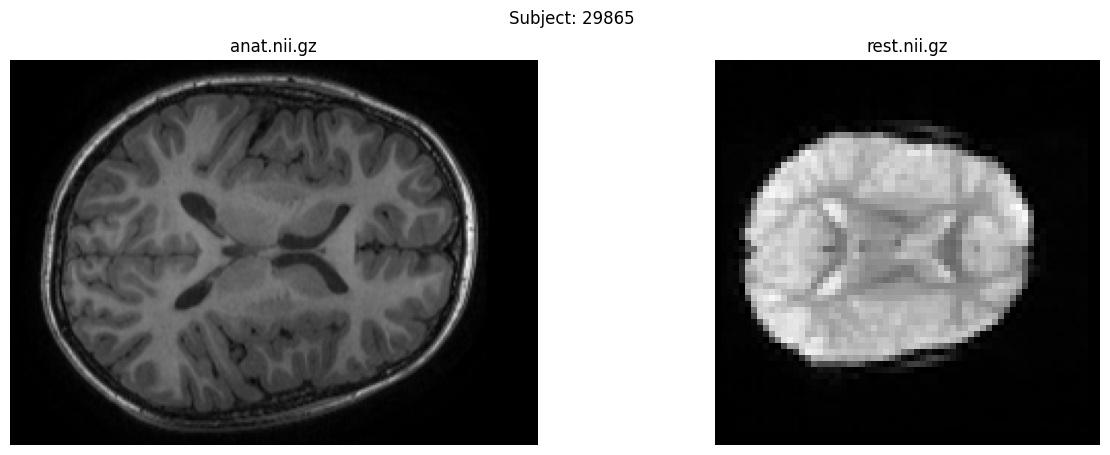

Subject: 29866
anat.nii.gz shape: (186, 256, 256)
rest.nii.gz shape: (64, 64, 37, 160)


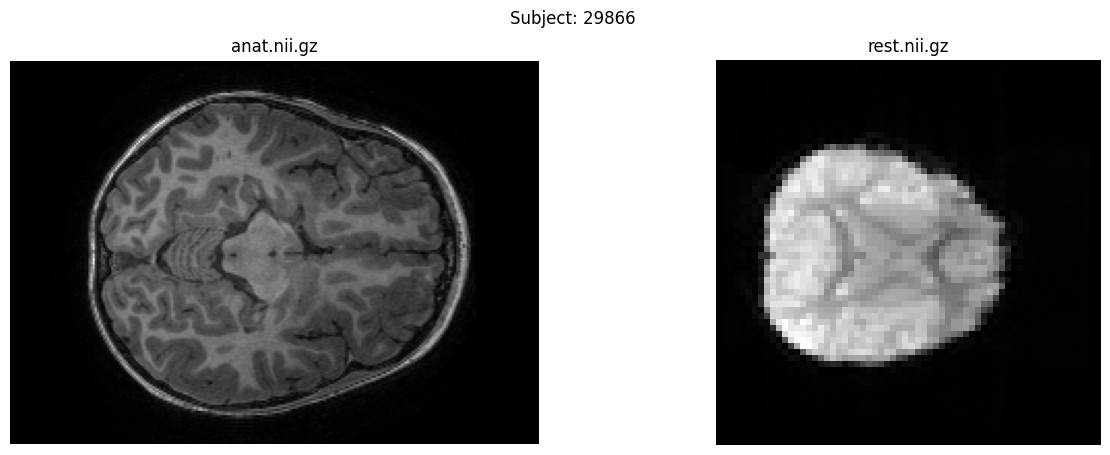

Subject: 29867
anat.nii.gz shape: (186, 256, 256)
rest.nii.gz shape: (64, 64, 37, 160)


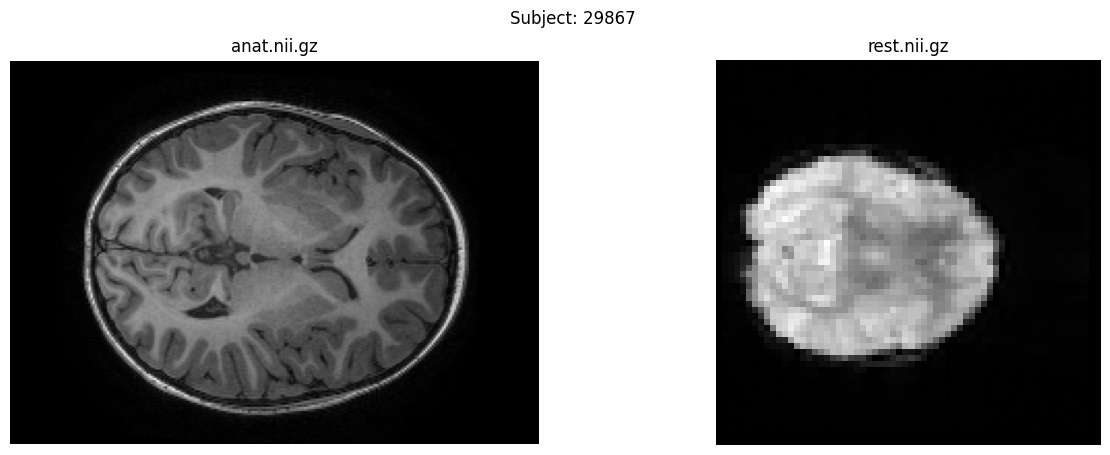

Subject: 29868
anat.nii.gz shape: (187, 256, 256)
rest.nii.gz shape: (64, 64, 37, 160)


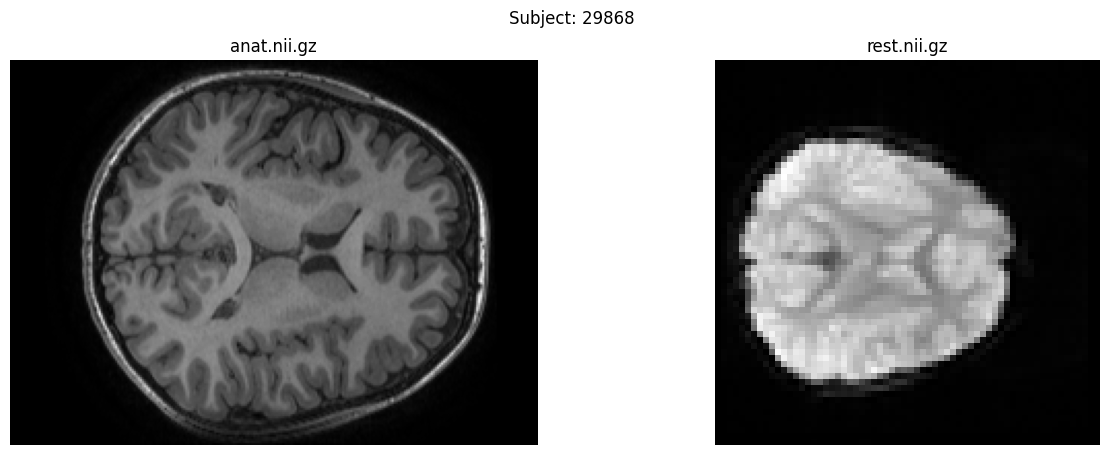

In [ ]:
# Get a list of all subjects:
subjects = os.listdir(extracted_folder)

for subject in sorted(subjects):
  nii_files = list_files_in_directory(f"{extracted_folder + subject}")
  fig_rows = 1
  fig_cols = 2
  n_subplots = fig_rows * fig_cols
  fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[15, 5])

  idx = 0
  for nii_file in sorted(nii_files):
    if nii_file.endswith('.nii') or nii_file.endswith('.nii.gz'):
      file_name = os.path.basename(nii_file)
      file_path = os.path.join(extracted_folder, nii_file)
      img = nib.load(file_path)

      # Print shapes:
      if (idx == 0):
        print(f"Subject: {subject}")
      print(f"{file_name} shape: {img.shape}")

      # Check dimensionality
      if img.get_fdata().ndim == 3:
        # Choose the middle slice along the z-axis
        slice_idx = img.shape[-1] // 2  # Assuming the slice index is along the z-axis
        slice_data = img.get_fdata()[:, :, slice_idx]
      elif img.get_fdata().ndim == 4:
        # Choose the middle slice along the z-axis
        slice_idx = img.shape[-2] // 2  # Assuming the slice index is along the z-axis
        time_point = 0
        slice_data = img.get_fdata()[:, :, slice_idx, time_point]

      axs.flat[idx].imshow(slice_data, cmap='gray')
      axs.flat[idx].axis('off')
      axs.flat[idx].set_title(file_name)
      idx += 1

  plt.suptitle("Subject: " +  subject)
  plt.show()

### 1.2.4 Visualizing data using a 3D slicer (ITK-SNAP)

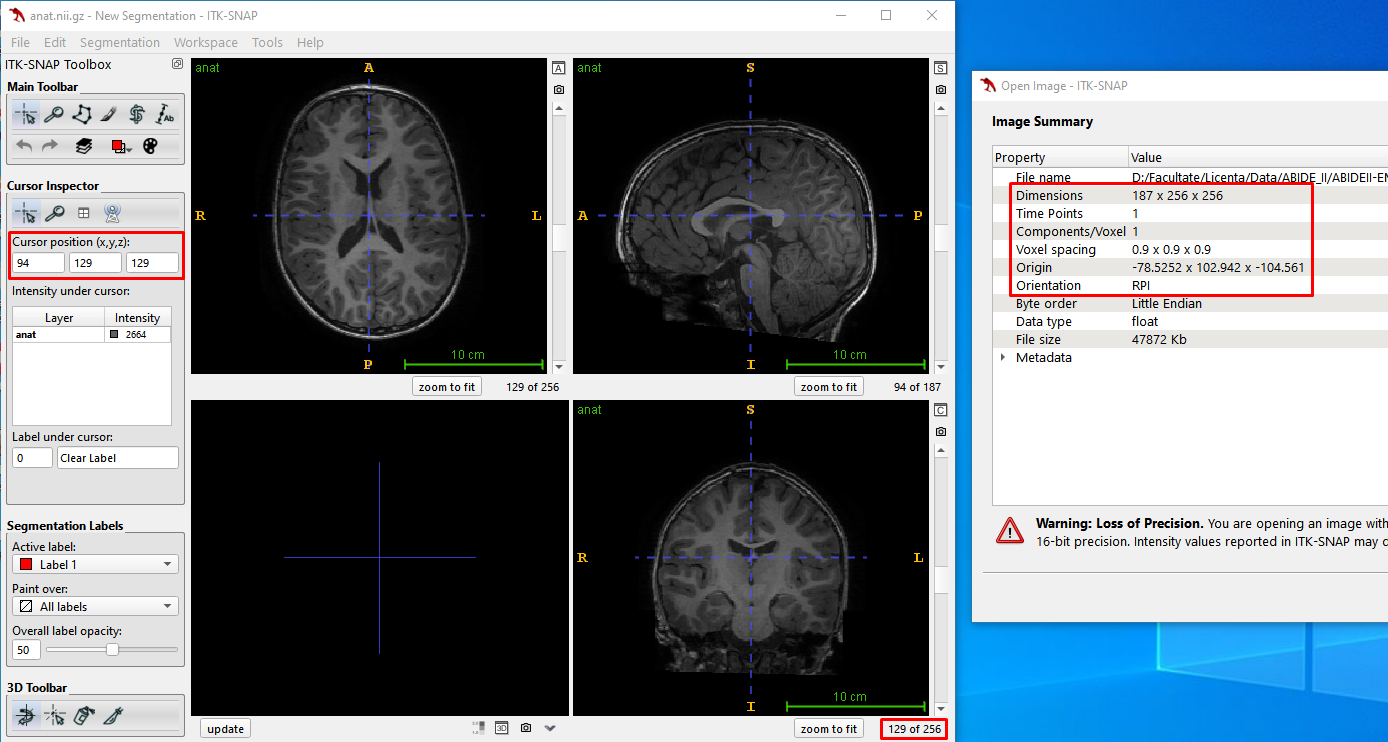

# 2. ADNI

Alzheimer's Disease Neuroimaging Initiative (ADNI) is a multisite study that aims to improve clinical trials for the prevention and treatment of Alzheimer's disease (AD). Its primary goal is to facilitate the detection of the earliest signs of AD.

A total of **819 subjects**.

Scans are distributed unevenly in **11 different collections**.

## 2.1. ADNI1:Annual 2 Yr 3T

### 2.1.1 Sample size

aMRI size: 240 x 250 x 160.
No slices: 160

### 2.1.2 Visualizing the first subjects

In [ ]:
rar_file_path = '/content/data/ADNI.rar'  # The path to the collection's .rar file
extracted_folder = '/content/data/ADNI/'  # Folder location for extraction
# Open the RAR archive
with rar.RarFile(rar_file_path, 'r') as rar:
    # Extract all files to the specified output directory
    rar.extractall(extracted_folder)

Subject: 023_S_0376
ADNI_023_S_0376_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061201170258692_S13786_I31392.nii shape: (240, 256, 160)


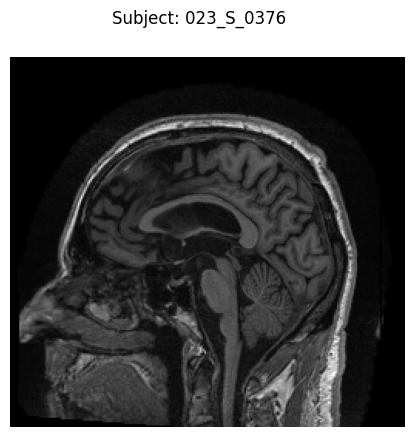

Subject: 023_S_0388
ADNI_023_S_0388_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061203120855584_S14001_I31446.nii shape: (240, 256, 160)


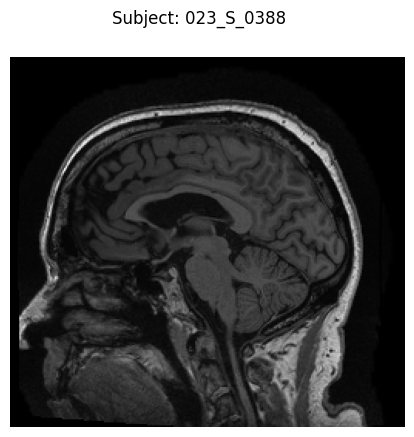

Subject: 023_S_0604
ADNI_023_S_0604_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20061203124804456_S15677_I31468.nii shape: (240, 256, 160)


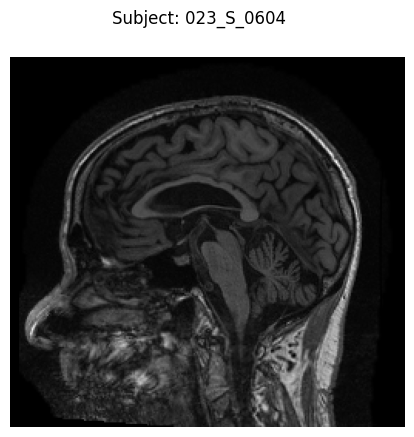

Subject: 023_S_0625
ADNI_023_S_0625_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061203133805576_S16766_I31500.nii shape: (240, 256, 160)


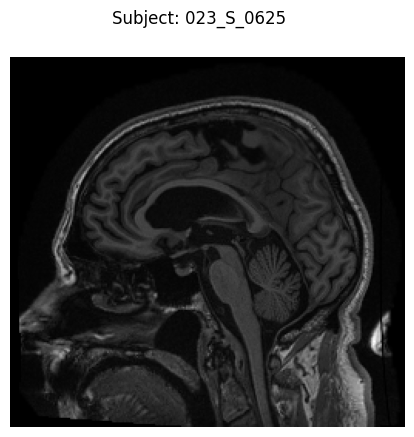

Subject: 027_S_0403
ADNI_027_S_0403_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080516100109644_S49902_I105888.nii shape: (240, 256, 160)


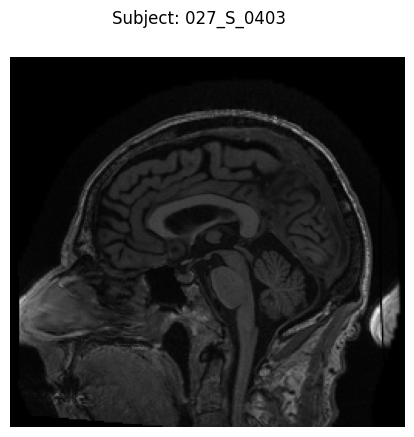

In [ ]:
# Get a list of all subjects:
extracted_folder = '/content/data/ADNI/ADNI/ADNI1_Annual 2 Yr 3T/ADNI/'
subjects = os.listdir(extracted_folder)

for subject in sorted(subjects):
  nii_file = list_files_in_directory(f"{extracted_folder + subject}")[0]
  file_name = os.path.basename(nii_file)
  file_path = os.path.join(extracted_folder, nii_file)
  img = nib.load(file_path)

  # Print shapes:
  print(f"Subject: {subject}")
  print(f"{file_name} shape: {img.shape}")

  # Check dimensionality
  if img.get_fdata().ndim == 3:
    # Choose the middle slice along the z-axis
    slice_idx = img.shape[-1] // 2  # Assuming the slice index is along the z-axis
    slice_data = img.get_fdata()[:, :, slice_idx]
  elif img.get_fdata().ndim == 4:
    # Choose the middle slice along the z-axis
    slice_idx = img.shape[-2] // 2  # Assuming the slice index is along the z-axis
    time_point = 0
    slice_data = img.get_fdata()[:, :, slice_idx, time_point]

  plt.imshow(slice_data, cmap='gray')
  plt.axis('off')
  plt.suptitle("Subject: " +  subject)
  plt.show()

### 2.1.3 Visualization with ITK-SNAP

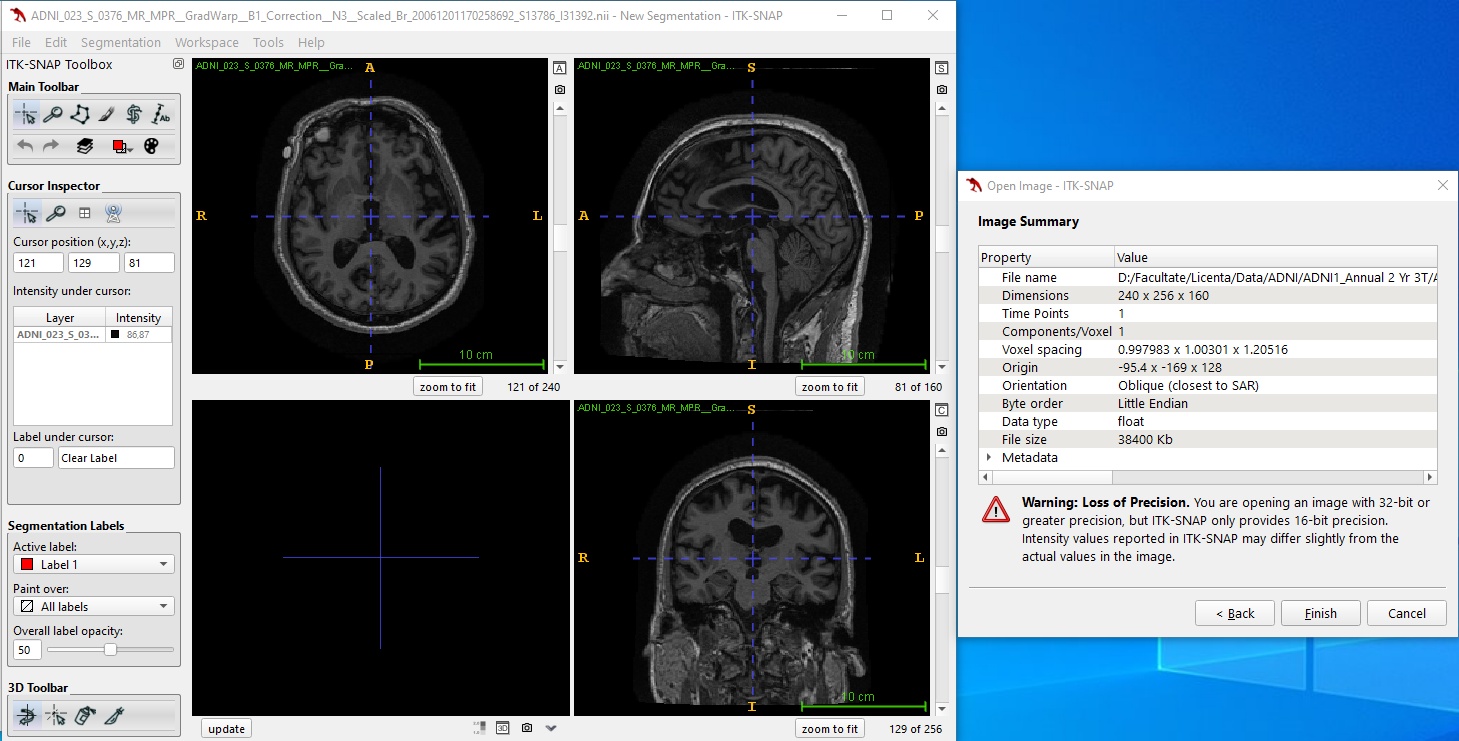

# 3. LA5C

## 3.1 Sample data
Each subject is accompanied by multiple MRI scans and modalities:
- anat
- beh (BOLF fMRI)
- dwi (diffusion weighted)
- func (functional imaging)

Anatomical MRI shape:

## 3.2 Visualize some scans

In [ ]:
rar_file_path = '/content/data/LA5C_ONE_STUDY.rar'  # The path to the collection's .rar file
extracted_folder = '/content/data/LA5C_ONE_STUDY/'  # Folder location for extraction
# Open the RAR archive
with rar.RarFile(rar_file_path, 'r') as rar:
    # Extract all files to the specified output directory
    rar.extractall(extracted_folder)

Subject: sub-10304
sub-10304_T1w.nii.gz shape: (176, 256, 256)


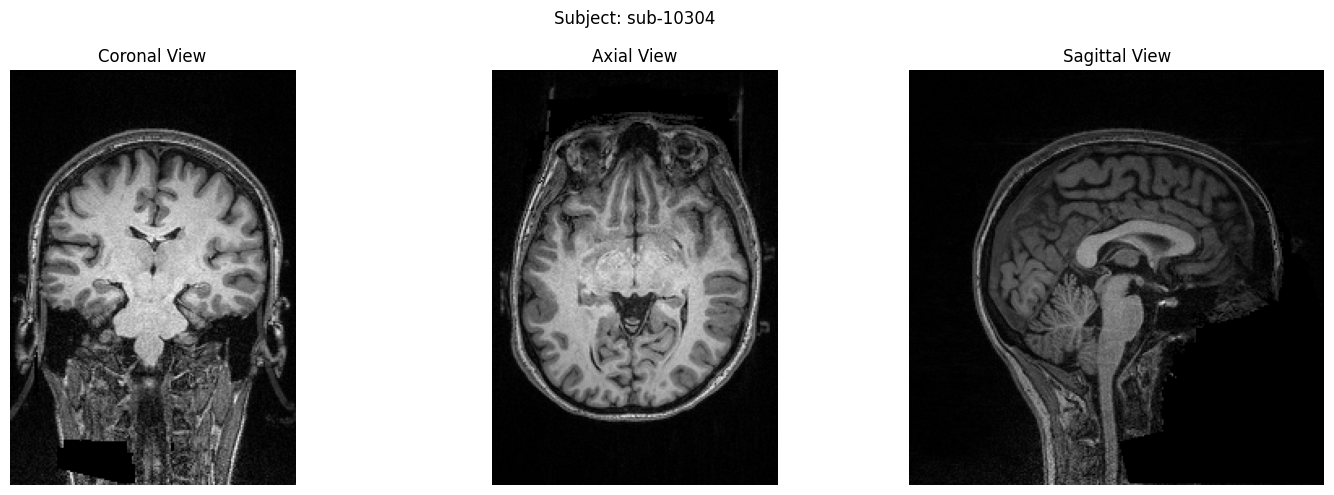

In [ ]:
# Get a list of all subjects:
subjects = os.listdir(extracted_folder)

for subject in sorted(subjects):
  nii_files = list_files_in_directory(f"{extracted_folder + subject}")
  nii_file = [file for file in nii_files if "T1w" in file and ".nii" in file][0]
  file_name = os.path.basename(nii_file)
  file_path = os.path.join(extracted_folder, nii_file)
  img = nib.load(file_path)

  # Print shapes:
  print(f"Subject: {subject}")
  print(f"{file_name} shape: {img.shape}")

  # Define the slices for coronal, axial, and sagittal views
  img_data = img.get_fdata()
  coronal_slice = img_data[:, img.shape[1] // 2, :]
  axial_slice = img_data[:, :, img.shape[2] // 2]
  sagittal_slice = img_data[img.shape[0] // 2, :, :]

  # Create subplots for the three views
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  # Plot coronal view
  axes[0].imshow(coronal_slice.T, cmap='gray', origin='lower')
  axes[0].set_title('Coronal View')

  # Plot axial view
  axes[1].imshow(axial_slice.T, cmap='gray', origin='lower')
  axes[1].set_title('Axial View')

  # Plot sagittal view
  axes[2].imshow(sagittal_slice.T, cmap='gray', origin='lower')
  axes[2].set_title('Sagittal View')

  # Hide axis labels and ticks
  for ax in axes:
      ax.axis('off')

  # Display the plot
  plt.suptitle("Subject: " +  subject)
  plt.tight_layout()
  plt.show()

## 3.3 Visualize data in ITK-SNAP

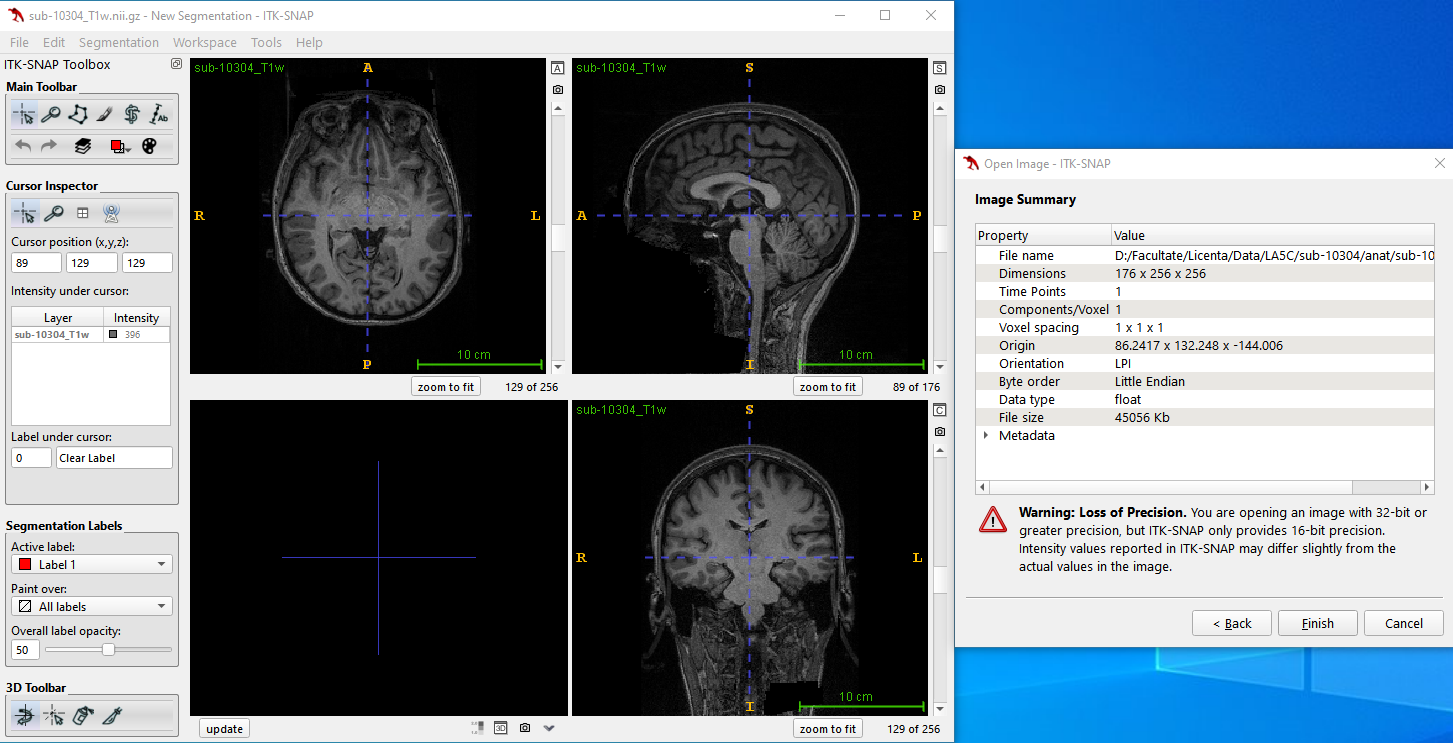

# 4. OASIS-1

# 5. OASIS-2

## 5.1 Sample data

This dataset contains up to **343 MRI sessions**.

Each subject has its own directory, in which you can find every distinct session.

Each session contains a **.hdr** file and an **.img** file.

The usual shape of the image data is: **256 x 256 x 128 x 1**

## 5.2 Plot some data

In [ ]:
import zipfile

zip_file_path = '/content/data/OASIS-II.zip'  # The path to the collection's .rar file
extracted_folder = '/content/data/OASIS-II/'  # Folder location for extraction
# Open the .zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List the names of all files and folders inside the zip archive
    file_list = zip_ref.namelist()

    # Extract all files and folders from the zip archive to the specified directory
    zip_ref.extractall(extracted_folder)

In [ ]:
# Get a list of all subjects:
extracted_folder = '/content/data/OASIS-II/'
subjects = os.listdir(extracted_folder)

for subject in sorted(subjects):
  print(f"\n\n\n\nSubject: {subject}")

  # Get the list of studies (2-4 per subject)
  studies = os.listdir(extracted_folder + subject)
  for study in sorted(studies):
    study_path = extracted_folder + subject + '/' + study
    nii_files = list_files_in_directory(study_path)

    hdr_file_path = nii_files[0] # Header file
    img_file_path = nii_files[1] # Img file

    # Load the 4D data
    img = nib.load(hdr_file_path)

    # Get the image data as a NumPy array
    image_data = img.get_fdata()

    # Print shapes:
    print(f"{file_name} shape: {img.shape}")

    # Define the time point:
    time_point = 0

    # Define the slices for coronal, axial, and sagittal views
    img_data = img.get_fdata()
    coronal_slice = img_data[img.shape[0] // 2, :, :, time_point]
    axial_slice = img_data[:, img.shape[1] // 2, :, time_point]
    sagittal_slice = img_data[:, :, img.shape[2] // 2, time_point]

    # Create subplots for the three views
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot coronal view
    axes[0].imshow(ndi.rotate(coronal_slice.T, -90), cmap='gray', origin='lower')
    axes[0].set_title('Coronal View')

    # Plot axial view
    axes[1].imshow(ndi.rotate(axial_slice.T, -90), cmap='gray', origin='lower')
    axes[1].set_title('Axial View')

    # Plot sagittal view
    axes[2].imshow(sagittal_slice.T, cmap='gray', origin='lower')
    axes[2].set_title('Sagittal View')

    # Hide axis labels and ticks
    for ax in axes:
        ax.axis('off')

    # Display the plot
    plt.suptitle(f"Subject: {subject}. Study: {study}")
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 5.3 Visualize some data in ITK-SNAP

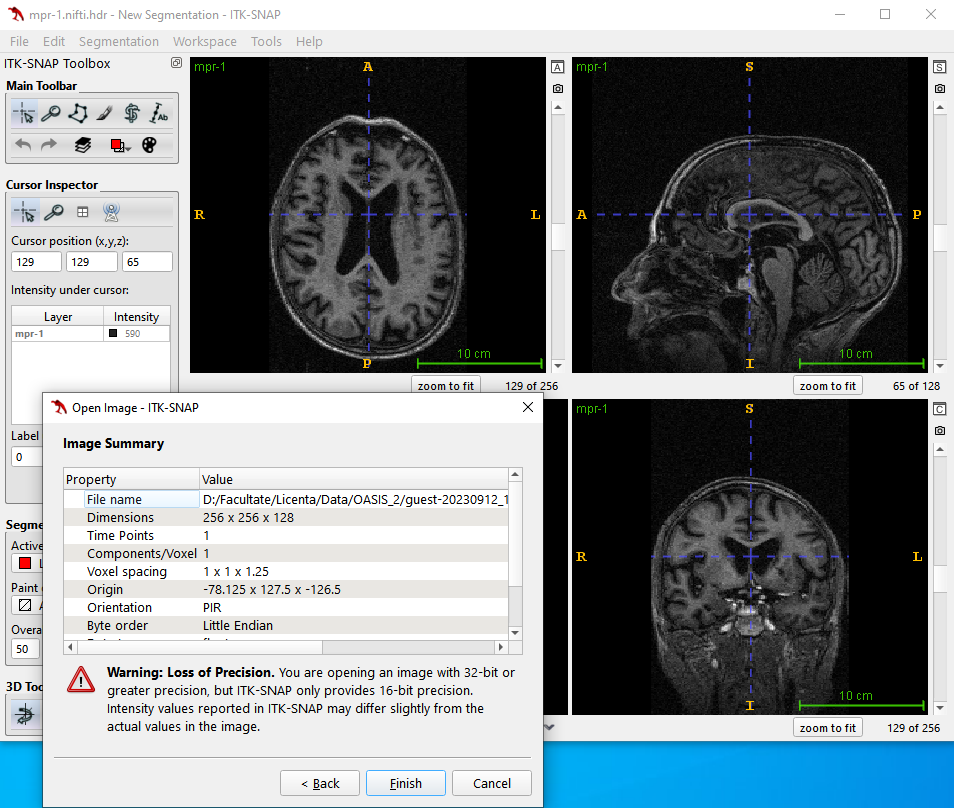

# 6. Mindboggle-101

## 6.1. Sample Data

A total of 101 scans, with different origins. Both scans and labels are provided for each of them.

## 6.2 Visualize Data

In [ ]:
import rarfile as rar

rar_file_path = '/content/Mindboggle_Test_Volume.rar'  # The path to the collection's .rar file
extracted_folder = '/content/data/Mindboggle_Test_Volume/'  # Folder location for extraction
# Open the RAR archive
with rar.RarFile(rar_file_path, 'r') as rar:
    # Extract all files to the specified output directory
    rar.extractall(extracted_folder)

OASIS-TRT-20-1_DKT31_CMA_labels_in_MNI152.nii.gz. Img1 shape: (182, 218, 182), img2 shape: (182, 218, 182)


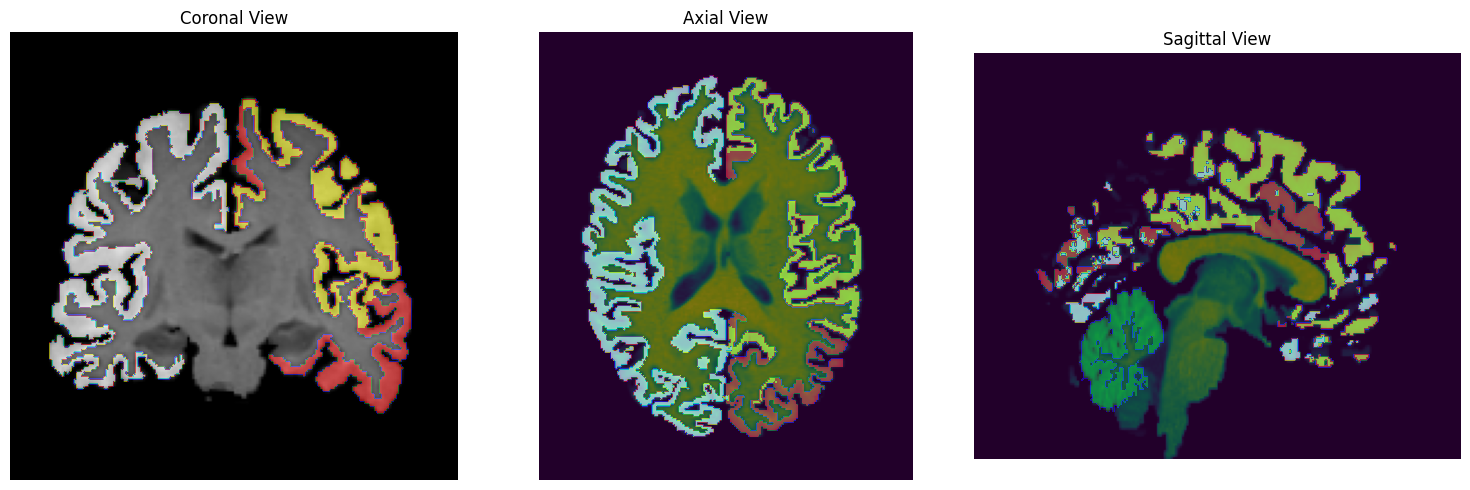

In [ ]:
from matplotlib.colors import ListedColormap
# Define a custom colormap (or use a predefined one)
# You can customize the colors based on your segmented regions
cmap = ListedColormap(['black', 'blue', 'green', 'red', 'yellow', 'purple', 'cyan', 'white'])

# Get the image and the label files:
nii_files = list_files_in_directory(extracted_folder)

# Get images
file_name = os.path.basename(nii_files[1])
file_path = os.path.join(extracted_folder, nii_files[1])
img1 = nib.load(file_path)
# print(file_path)

file_name = os.path.basename(nii_files[0])
file_path = os.path.join(extracted_folder, nii_files[0])
img2 = nib.load(file_path)
# print(file_path)

# Get image data
img_data1 = img1.get_fdata()
img_data2 = img2.get_fdata()

# # Print a slice of the data to inspect its content
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# print("MRI Image Slice (example):\n", img_data1[:, :, 0])
# print("Segmented Data Slice (example):\n", img_data2[:, :, 0])

# Print shapes:
print(f"{file_name}. Img1 shape: {img1.shape}, img2 shape: {img2.shape}")

# Define the slices for coronal, axial, and sagittal views
coronal_slice1 = img_data1[:, img1.shape[1] // 2, :]
axial_slice1 = img_data1[:, :, img1.shape[2] // 2]
sagittal_slice1 = img_data1[img1.shape[0] // 2, :, :]

coronal_slice2 = img_data2[:, img2.shape[1] // 2, :]
axial_slice2 = img_data2[:, :, img2.shape[2] // 2]
sagittal_slice2 = img_data2[img2.shape[0] // 2, :, :]

# Create subplots for the three views
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot coronal view
axes[0].imshow(coronal_slice1.T, cmap='gray', origin='lower')
axes[0].imshow(coronal_slice2.T, cmap=cmap, origin='lower', alpha=0.5)
axes[0].set_title('Coronal View')

# Plot axial view
axes[1].imshow(axial_slice1.T, origin='lower')
axes[1].imshow(axial_slice2.T, cmap=cmap, origin='lower', alpha=0.5)
axes[1].set_title('Axial View')

# Plot sagittal view
axes[2].imshow(sagittal_slice1.T, origin='lower')
axes[2].imshow(sagittal_slice2.T, cmap=cmap, origin='lower', alpha=0.5)
axes[2].set_title('Sagittal View')

# Hide axis labels and ticks
for ax in axes:
    ax.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

Note that the vizualisation is not as expected. The ROI colors do not correspond to ones from the original output. An easy way to vizualise data is to use either FreeView (developed by FreeSurfer's team), or external tools such as 3D Slicer.

## 6.3 Vizualise data in 3D Slicer

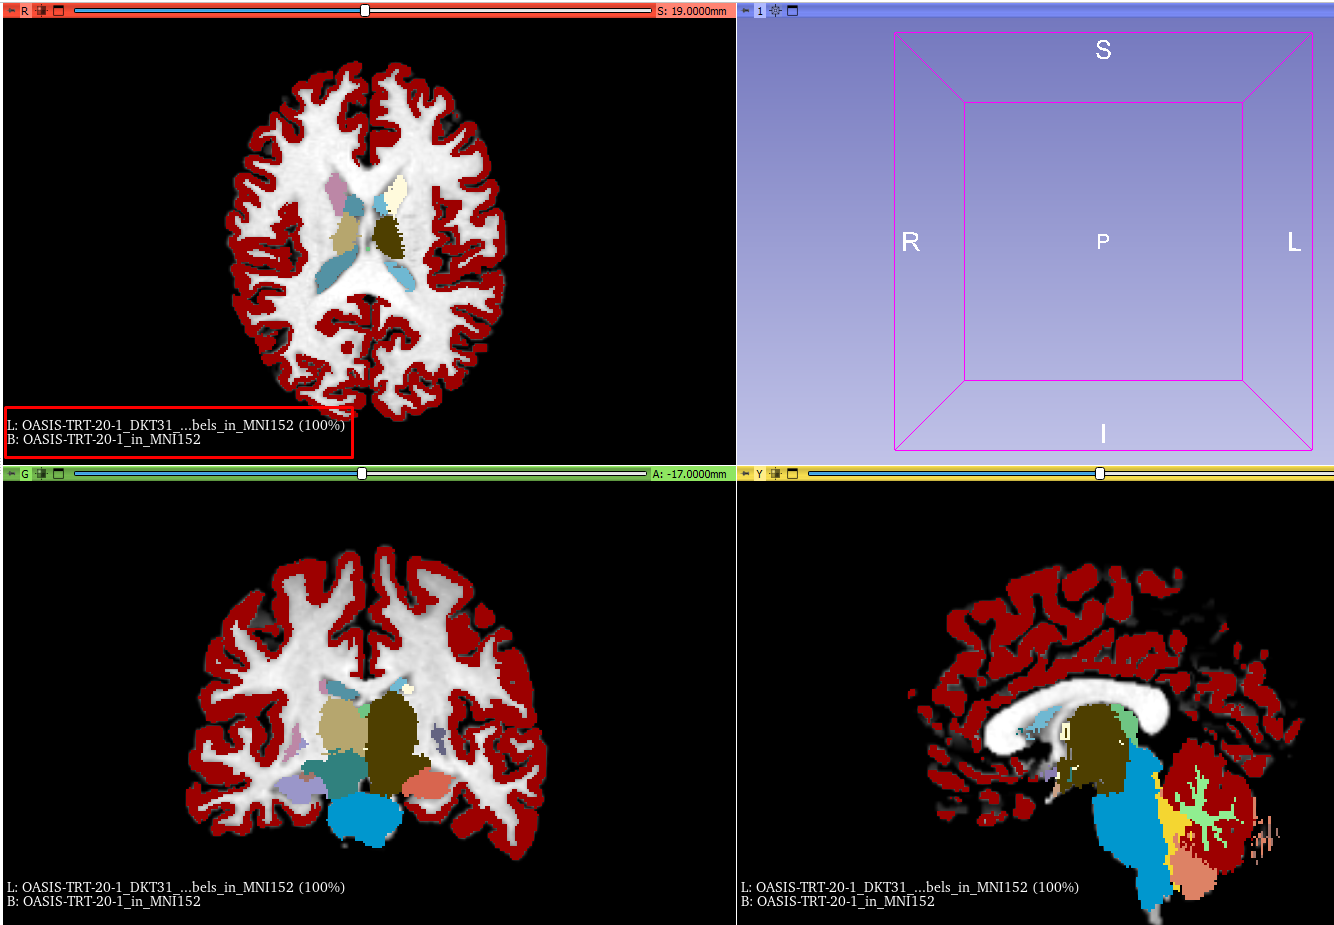

# 7. HCP (The Human Connectome Project)

## 7.1 Sample size

35 MPRAGE scans (from 35 healthy adult subjects)

Each scan has a shape of: 256 x 256 x 176


## 7.2 Vizualise data

In [ ]:
import rarfile as rar

rar_file_path = '/content/HCP_5_SUBJECTS.rar'  # The path to the collection's .rar file
extracted_folder = '/content/data/HCP_5_SUBJECTS/'  # Folder location for extraction
# Open the RAR archive
with rar.RarFile(rar_file_path, 'r') as rar:
    # Extract all files to the specified output directory
    rar.extractall(extracted_folder)

Subject: mgh_1001
HCP_mgh_1001_MR_MPRAGE_GradWarped_and_Defaced_Br_20140919084711597_S227198_I444246.nii shape: (256, 256, 176)


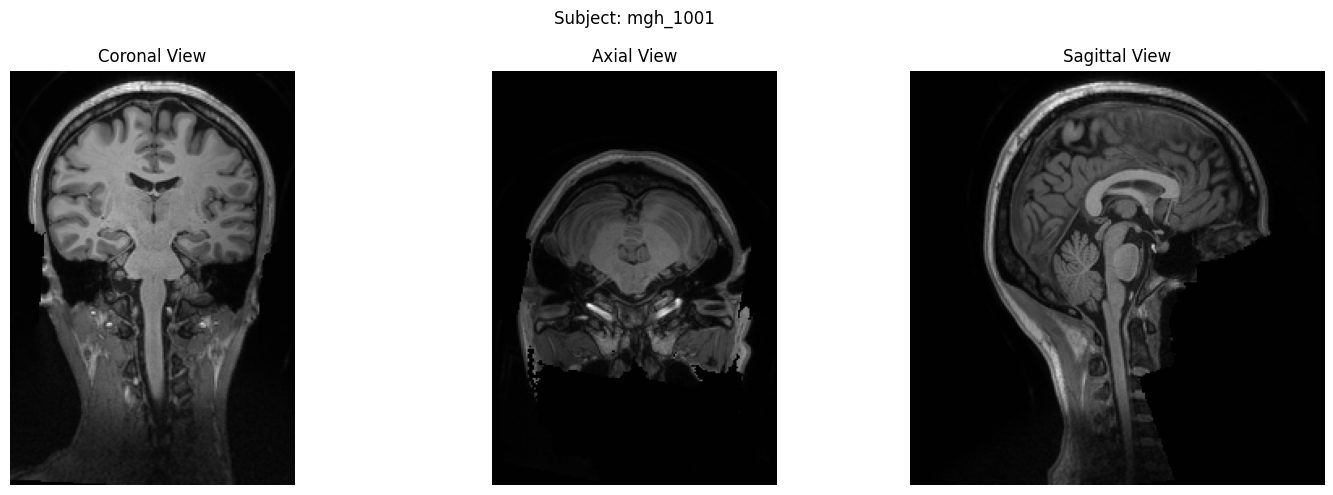

Subject: mgh_1002
HCP_mgh_1002_MR_MPRAGE_GradWarped_and_Defaced_Br_20140919135330625_S227329_I444329.nii shape: (256, 256, 176)


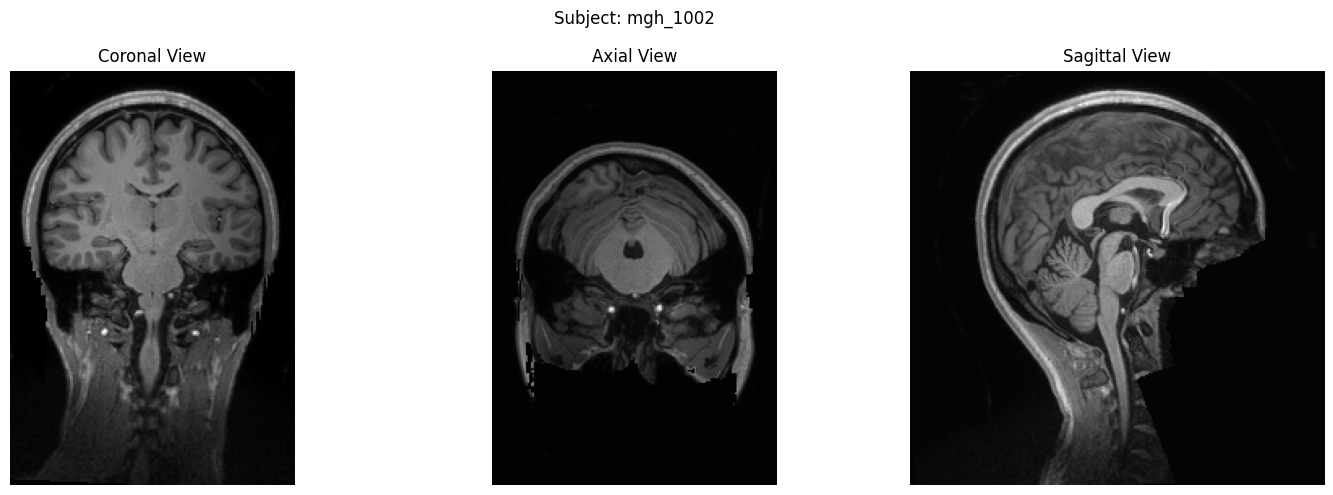

Subject: mgh_1003
HCP_mgh_1003_MR_MPRAGE_GradWarped_and_Defaced_Br_20140919135339481_S227362_I444330.nii shape: (256, 256, 176)


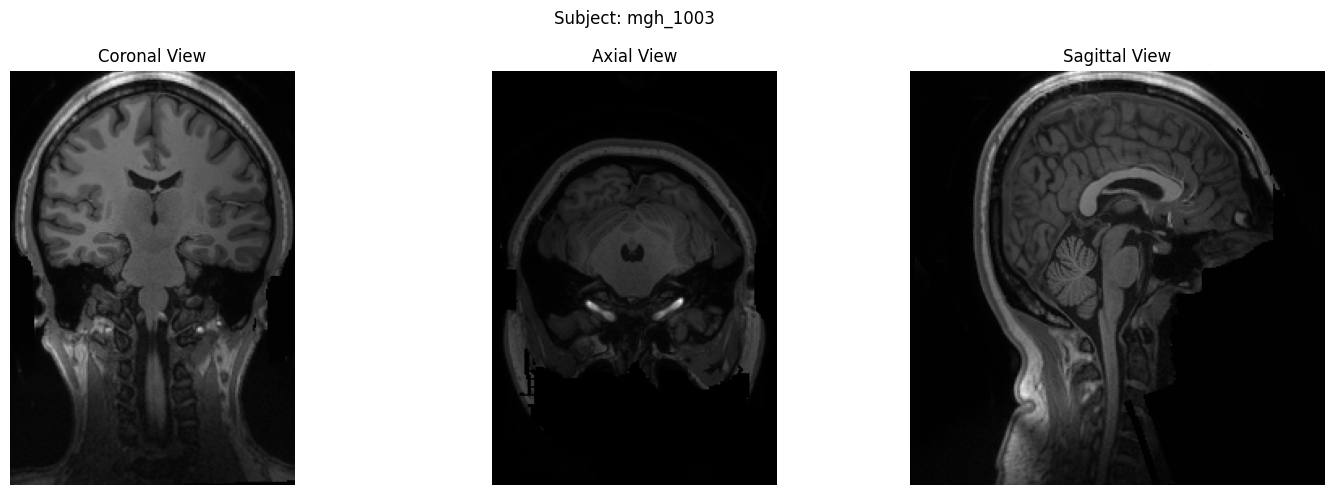

Subject: mgh_1005
HCP_mgh_1005_MR_MPRAGE_GradWarped_and_Defaced_Br_20140919135349082_S227555_I444331.nii shape: (256, 256, 176)


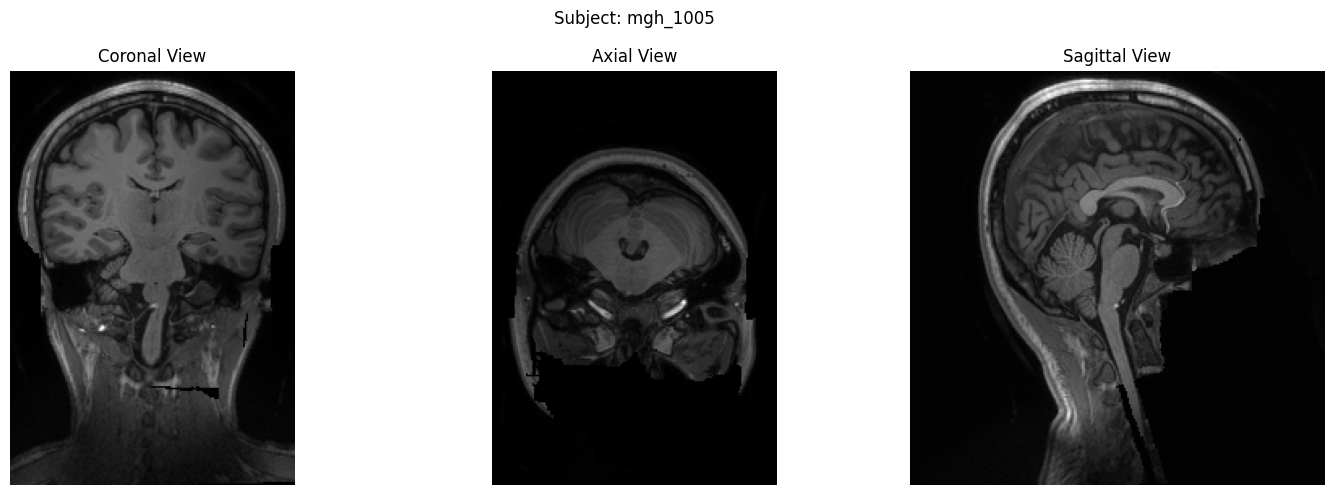

In [ ]:
# Get a list of all subjects:
subjects = os.listdir(extracted_folder)

for subject in sorted(subjects):
  nii_file = list_files_in_directory(f"{extracted_folder + subject}")[0]
  file_name = os.path.basename(nii_file)
  file_path = os.path.join(extracted_folder, nii_file)
  img = nib.load(file_path)

  # Print shapes:
  print(f"Subject: {subject}")
  print(f"{file_name} shape: {img.shape}")

  # Define the slices for coronal, axial, and sagittal views
  img_data = img.get_fdata()
  coronal_slice = img_data[img.shape[0] // 2, :, :]
  axial_slice = img_data[:, img.shape[1] // 2, :]
  sagittal_slice = img_data[:, :, img.shape[2] // 2]

  # Create subplots for the three views
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  # Plot coronal view
  axes[0].imshow(ndi.rotate(coronal_slice.T, 90), cmap='gray', origin='lower')
  axes[0].set_title('Coronal View')

  # Plot axial view
  axes[1].imshow(ndi.rotate(axial_slice.T, -90), cmap='gray', origin='lower')
  axes[1].set_title('Axial View')

  # Plot sagittal view
  axes[2].imshow(ndi.rotate(sagittal_slice.T, -180), cmap='gray', origin='lower')
  axes[2].set_title('Sagittal View')

  # Hide axis labels and ticks
  for ax in axes:
      ax.axis('off')

  # Display the plot
  plt.suptitle("Subject: " +  subject)
  plt.tight_layout()
  plt.show()

# 8. THP (Traveling Human Phantom Study)

## 8.1 Sample size

5 subjects: multiple sessions performed

Only T1-weighted scans have been considered

Each scan has a shape of: 256 x 240 x 256

## 8.2 Plot some data

In [ ]:
import rarfile as rar

rar_file_path = '/content/THP_SAMPLE.rar'  # The path to the collection's .rar file
extracted_folder = '/content/data/THP_SAMPLE/'  # Folder location for extraction
# Open the RAR archive
with rar.RarFile(rar_file_path, 'r') as rar:
    # Extract all files to the specified output directory
    rar.extractall(extracted_folder)

Subject: sub-THP0001_ses-THP0001CCF1_run-01_T1w.nii.gz
sub-THP0001_ses-THP0001CCF1_run-01_T1w.nii.gz shape: (256, 240, 256)


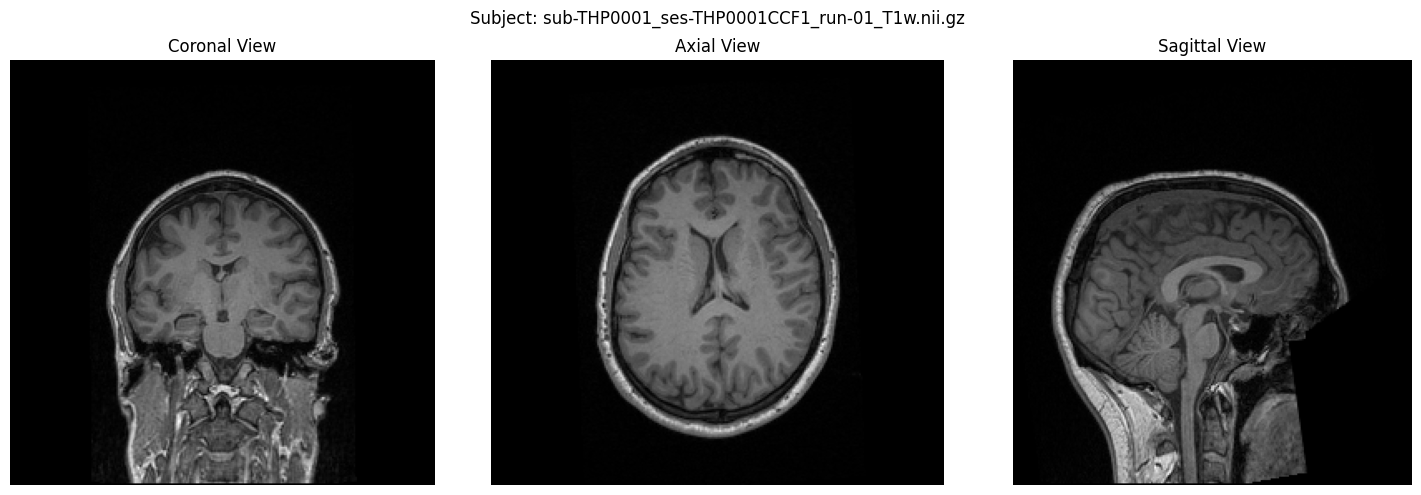

Subject: sub-THP0001_ses-THP0001DART1_run-01_T1w.nii.gz
sub-THP0001_ses-THP0001DART1_run-01_T1w.nii.gz shape: (224, 164, 224)


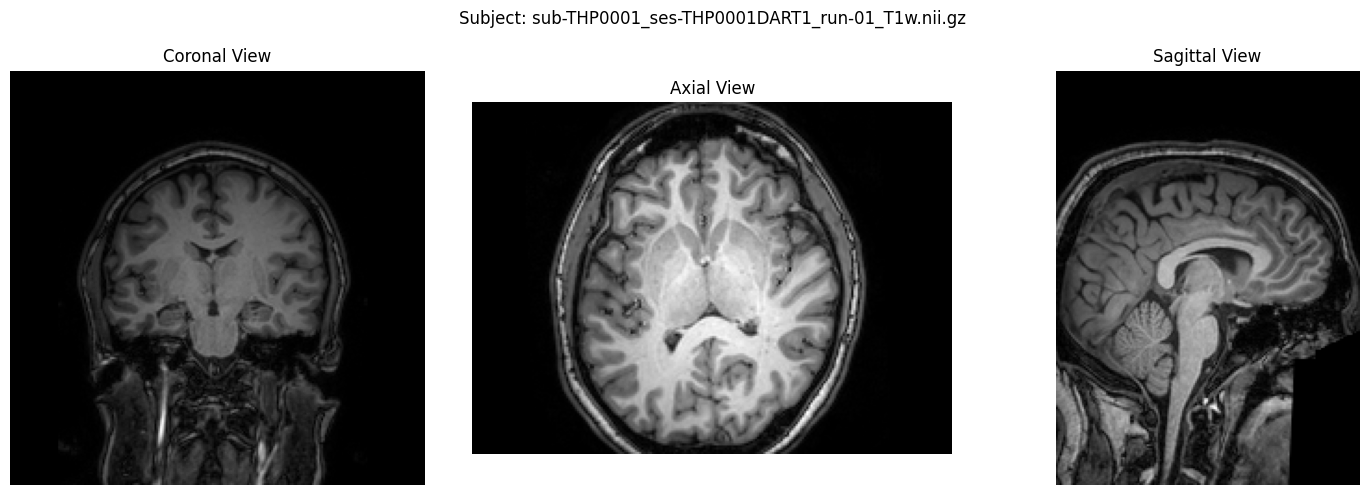

Subject: sub-THP0001_ses-THP0001IOWA1_run-01_T1w.nii.gz
sub-THP0001_ses-THP0001IOWA1_run-01_T1w.nii.gz shape: (256, 240, 256)


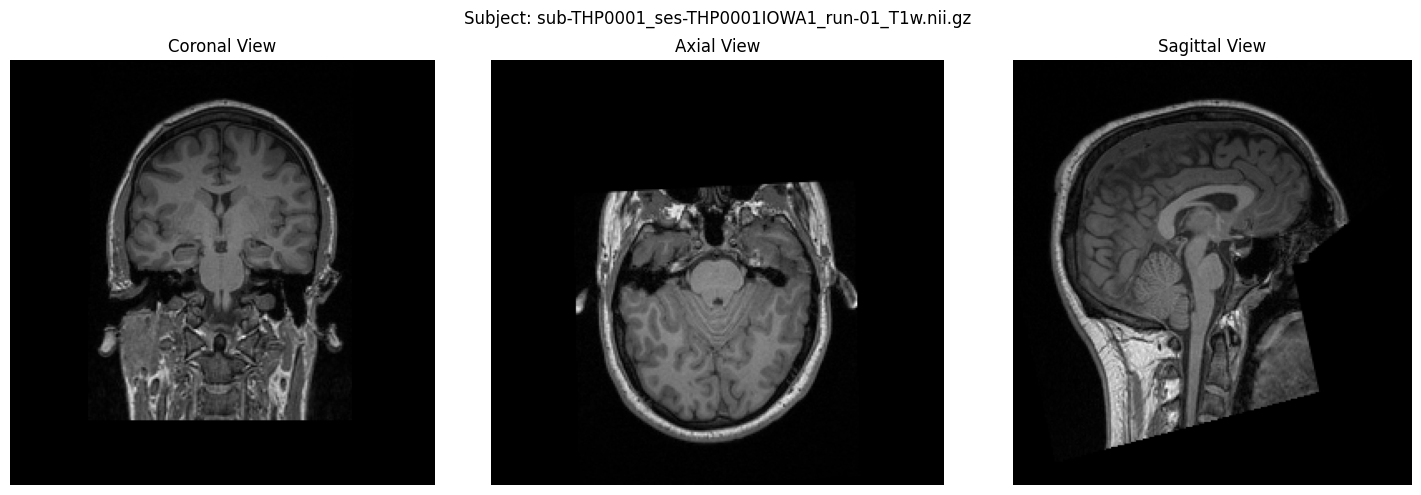

In [ ]:
# Get a list of all subjects:
subjects = os.listdir(extracted_folder)

for subject in sorted(subjects):
  nii_file = subject
  file_name = os.path.basename(nii_file)
  file_path = os.path.join(extracted_folder, nii_file)
  img = nib.load(file_path)

  # Print shapes:
  print(f"Subject: {subject}")
  print(f"{file_name} shape: {img.shape}")

  # Define the slices for coronal, axial, and sagittal views
  img_data = img.get_fdata()
  coronal_slice = img_data[:, img.shape[1] // 2, :]
  axial_slice = img_data[:, :, img.shape[2] // 2]
  sagittal_slice = img_data[img.shape[0] // 2, :, :]

  # Create subplots for the three views
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  # Plot coronal view
  axes[0].imshow(coronal_slice.T, cmap='gray', origin='lower')
  axes[0].set_title('Coronal View')

  # Plot axial view
  axes[1].imshow(axial_slice.T, cmap='gray', origin='lower')
  axes[1].set_title('Axial View')

  # Plot sagittal view
  axes[2].imshow(sagittal_slice.T, cmap='gray', origin='lower')
  axes[2].set_title('Sagittal View')

  # Hide axis labels and ticks
  for ax in axes:
      ax.axis('off')

  # Display the plot
  plt.suptitle("Subject: " +  subject)
  plt.tight_layout()
  plt.show()